## What is Hierarchical Clustering?

Hierarchical clustering is another Unsupervised Machine Learning algorithm used to group the unlabeled datasets into a cluster. It develops the hierarchy of clusters in the form of a tree-shaped structure known as a dendrogram. A dendrogram is a tree diagram showing hierarchical relationships between different datasets.

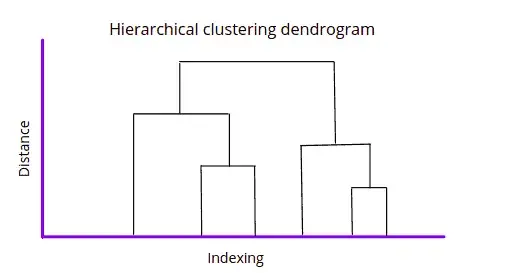

Sometimes the results of K-means clustering and hierarchical clustering may look similar, but they both differ depending on how they work.

**Hierarchical clustering uses two different approaches to create clusters:**

- **Agglomerative** is a bottom-up approach in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.

- **Divisive** is the reverse to the agglomerative algorithm that uses a top-bottom approach (it takes all data points of a single cluster and divides them until every data point becomes a new cluster).

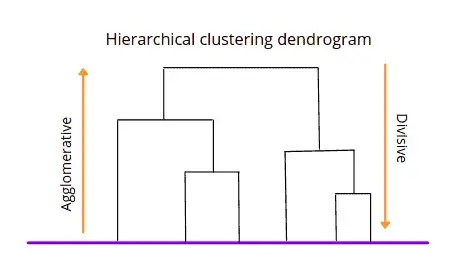

One of the most significant advantages of Hierarchical over K-mean clustering is the algorithm doesn’t need to know the predefined number of clusters. We can assign the number of clusters depending on the dendrogram structure.

## How Hierarchical clustering algorithm works?

Let’s focus on the Agglomerative method to describe how the Hierarchical clustering algorithm works. This method starts joining data points of the dataset that are the closest to each other and repeats until it merges all of the data points into a single cluster containing the entire dataset.

For example, let’s take six data points as our dataset and look at the Agglomerative Hierarchical clustering algorithm steps.

The very first step of the algorithm is to take every data point as a separate cluster. If there are N data points, the number of clusters will be N.

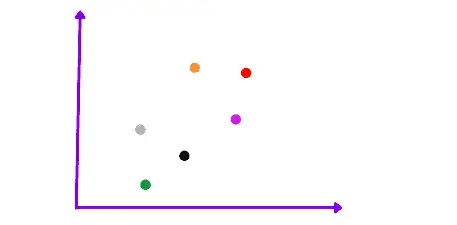

The next step of this algorithm is to take the two closest data points or clusters and merge them to form a bigger cluster. The total number of clusters becomes N-1.

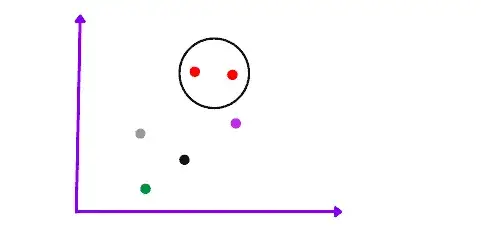

Subsequent algorithm iterations will continue merging the nearest two clusters until only one cluster is left.

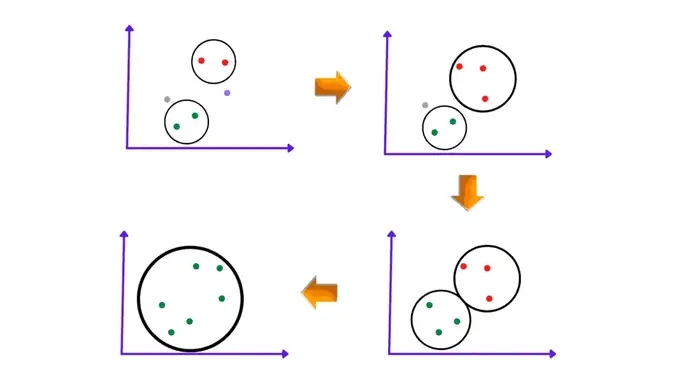

Once the algorithm combines all the data points into a single cluster, it can build the dendrogram describing the clusters’ hierarchy.

## Measuring distance bewteen two clusters

The distance between clusters or data points is crucial for Hierarchical clustering. Several Linkage methods can calculate this distance:

- **Single linkage** is the shortest distance between the closest points of the clusters calculated by any distance finding method (the most popular is the Euclidean distance).

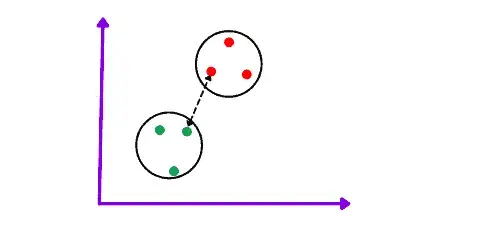

- **Complete linkage** is the longest distance between the two points of two different clusters. This linkage method allows you to create tighter clusters than a single linkage approach.

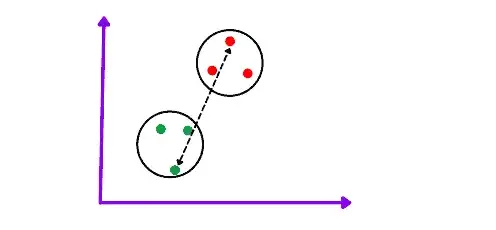

- **Centroid Linkage** is the distance between the centroid of two clusters.

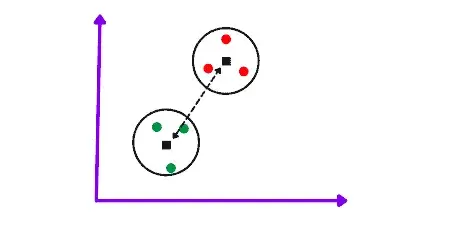

## Dendrogram in Hierarchical clustering

The dendrogram is a tree-like structure that stores each step of the Hierarchical algorithm execution process. In the Dendrogram plot, the x-axis shows all data points, and the y-axis shows the distance between them. The below dendrogram describes the formation of clusters.

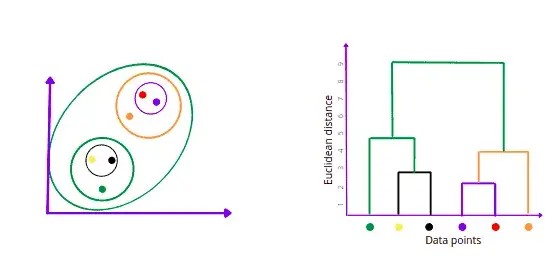

Once we have the dendrogram for the clusters, we can set a threshold (a red horizontal dashed line) to visually see the number of output classes from the dataset after algorithm execution.

Threshold is minimum distance required between the nearest clusters to treat them as a separate clusters. This is knowledge domain variable which you need to define yourself. If you don’t have enough information about your business domain, you can use the following methods to define the number of clusters in the dataset (take a look at the “7 methods for selecting the optimal number of clusters” article to find the implementation code).

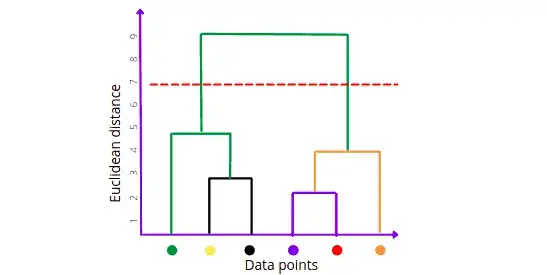

For example, for the threshold value of 7, the number of clusters will be 2. For the threshold value equal to 3, we’ll get 4 clusters, etc.

## Hierarchical clustering algorithm implementation

In [1]:
%pip install yellowbrick
%pip install chart_studio
%pip install plotly

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     -------------------------------------- 282.6/282.6 kB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/64.4 kB ? eta -:--:--
     ---------------------------------------- 64.4/64.4 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv("k-mean-dataset-mall-customer.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Checking for null values

df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


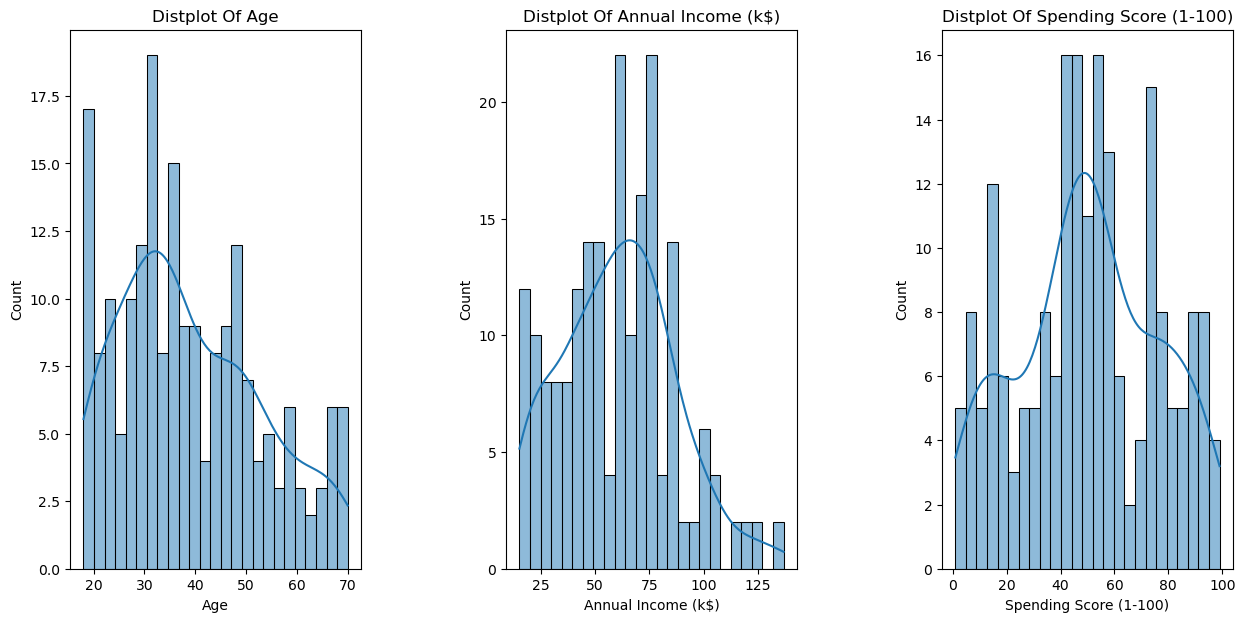

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# graph size

plt.figure(figsize=(15,7))

graph = 0
# for loop

for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    graph+=1
    
    # plotting graph
    plt.subplot(1,3,graph)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[i], bins=25, kde=True)
    plt.title(f"Distplot Of {i}")
    
# showing the graph
plt.show()

In [13]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Genre'] = le.fit_transform(df['Genre'])

# Preview of data

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


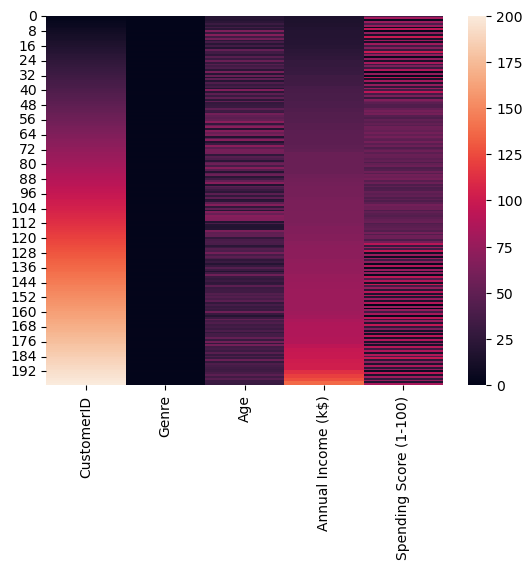

In [14]:
# heatmap

sns.heatmap(df)
plt.show()

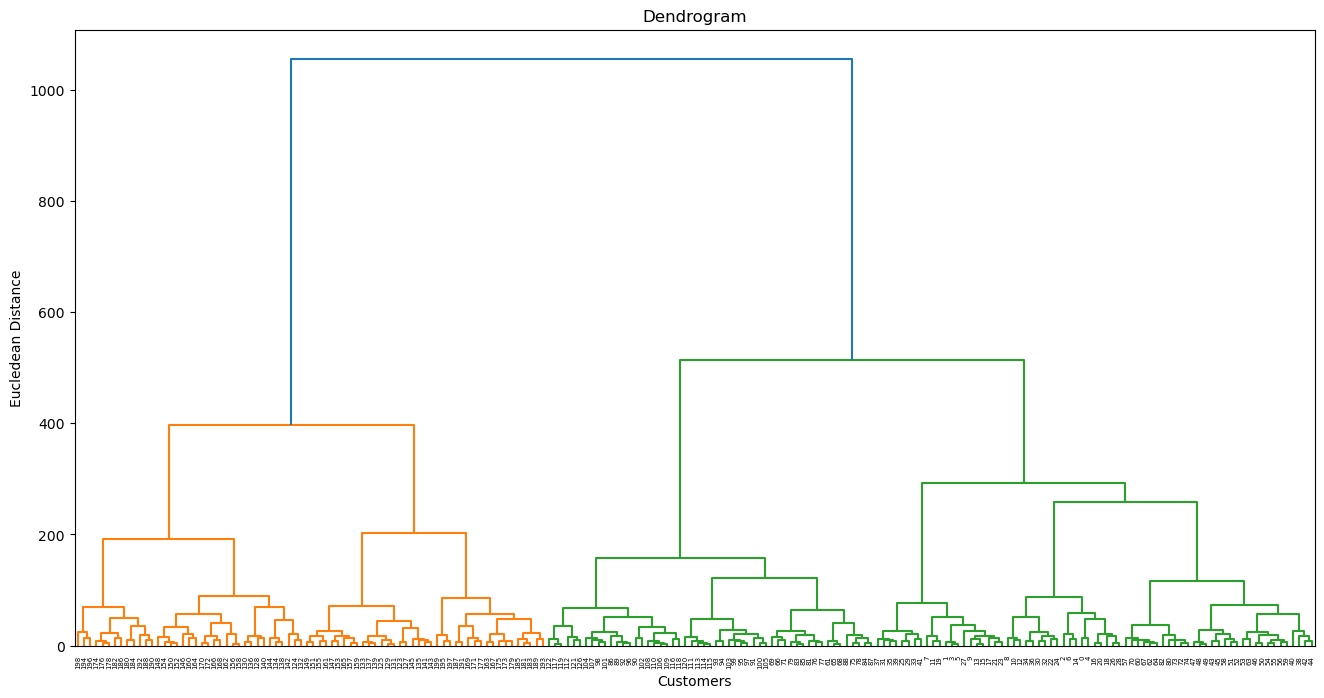

In [15]:
# Creating dendrogram

import scipy.cluster.hierarchy as sch

# grpah size
plt.figure(figsize=(16,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

# plotting graphs
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledean Distance")
plt.show()

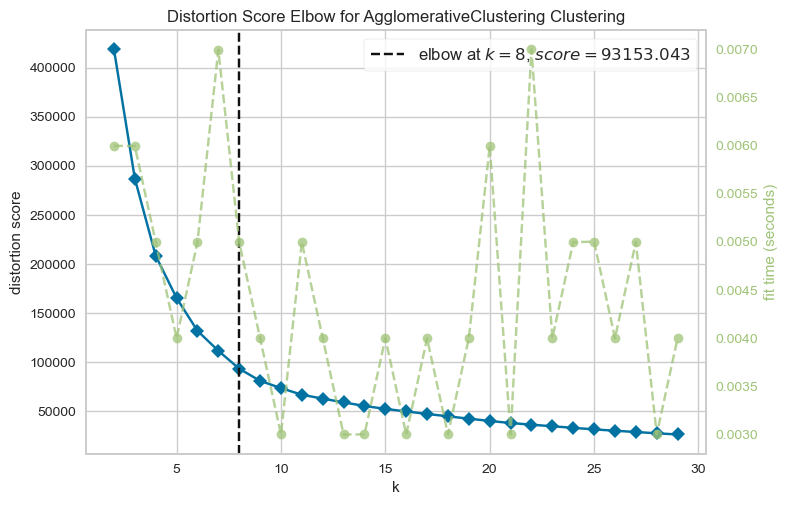

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Using elbow method to estimate number of clusters


# import ElbowVisualizer

from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

model = AgglomerativeClustering()

# k is the range of clusters

viz = KElbowVisualizer(model, k=(2,30))

# fit data to visualizer

viz.fit(df)

# finalizing and rendring figure
viz.show()